## PR: Implementation

In [78]:
from datetime import datetime

from IPython.core.debugger import Tracer
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils

%matplotlib inline
matplotlib.style.use('ggplot')
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [79]:
V = 10
B = 0.9
N = 10000

def gen_data_pr(V, B, N):
    X = np.zeros((N, 3), dtype=int)
    for n in xrange(N):
        p = q = np.random.randint(V)
        while p == q:
            q = np.random.randint(V)
        p, q = sorted([p, q])
        y = np.random.binomial(1, B)
        X[n,:] = np.array([p,q,y])
    return X

X = gen_data_pr(V, B, N)

In [227]:
def get_R_nrm(X, d=None):
    V = max(X[:,1]) + 1
    R = utils.get_interactions(X).astype(float)
    R += np.eye(V) * R.sum(axis=0) # Add self-edge equal to sum of victories
    Rt = R.T
    idx = Rt.sum(axis=0) > 0
    Rt[:,idx] /= Rt[:,idx].sum(axis=0)
    R_nrm = Rt.T
    
    if d:
        assert d > 0 and d < 1
        R_nrm *= d
        R_nrm += (1 - d) / V
        
    return R_nrm

R_nrm = get_R_nrm(X)
R_nrm

array([[ 0.11981567,  0.0921659 ,  0.09677419,  0.07834101,  0.09677419,
         0.10599078,  0.10599078,  0.09677419,  0.10138249,  0.10599078],
       [ 0.00917431,  0.16972477,  0.10550459,  0.05963303,  0.14678899,
         0.07798165,  0.10091743,  0.12385321,  0.11009174,  0.09633028],
       [ 0.00520833,  0.03125   ,  0.296875  ,  0.09375   ,  0.08854167,
         0.09895833,  0.06770833,  0.09375   ,  0.13541667,  0.08854167],
       [ 0.02272727,  0.        ,  0.        ,  0.34090909,  0.11363636,
         0.10227273,  0.13068182,  0.11363636,  0.0625    ,  0.11363636],
       [ 0.0199005 ,  0.        ,  0.00995025,  0.00995025,  0.49751244,
         0.08955224,  0.08955224,  0.08955224,  0.08457711,  0.10945274],
       [ 0.00515464,  0.01546392,  0.00515464,  0.01030928,  0.01030928,
         0.50515464,  0.12371134,  0.08762887,  0.12371134,  0.11340206],
       [ 0.02762431,  0.01104972,  0.00552486,  0.        ,  0.01104972,
         0.        ,  0.71270718,  0.06077348

In [228]:
def power_method(R_nrm):
    V = R_nrm.shape[0]
    x = np.zeros(V) + 1. / V
    prev = x
    while True:
        prev = x
        x = x.dot(R_nrm)
        if np.linalg.norm((x - prev)) < 0.0001:
            break
    return pd.Series(x).sort_values(ascending=False)

power_method(R_nrm)

9    0.555738
8    0.137001
7    0.112428
6    0.065942
5    0.027247
4    0.025761
2    0.024303
3    0.023757
0    0.014600
1    0.013224
dtype: float64

In [229]:
def np_method(R_nrm):
    eigval, eigvec = np.linalg.eig(R_nrm.T)
    eigval = pd.Series(eigval)
    ev = pd.Series(eigvec[:,eigval.idxmax()])
    return (ev / ev.sum()).sort_values(ascending=False) # Normalize to simplex

np_method(R_nrm)

9     (0.556004104522-0j)
8     (0.136819849331-0j)
7     (0.112408460981-0j)
6    (0.0658980317922-0j)
5     (0.027244408273-0j)
4    (0.0257447580201-0j)
2    (0.0243050408312-0j)
3    (0.0237577502466-0j)
0    (0.0145950544083-0j)
1     (0.013222541595-0j)
dtype: complex128

In [284]:
V = 10
B = 0.9
N = 1000
X = gen_data_pr(V, B, N)
R_nrm = get_R_nrm(X)
pw_out = power_method(R_nrm)
np_out = np_method(R_nrm)
pw_out

9    0.673137
8    0.108305
7    0.049856
6    0.044578
3    0.029041
5    0.026522
4    0.024715
2    0.018050
1    0.015088
0    0.010707
dtype: float64

In [303]:
def get_error(ordering):
    V = len(ordering)
#     return sum(np.abs(ordering.index**2 - np.arange(V)[::-1]**2))
    return sum(np.abs(ordering.index - np.arange(V)[::-1]))

get_error(pw_out)

4

## Simulations

- Power method
- Error = .9, .7
- N = 10, 100, 1000, 10000
- V = 100

In [292]:
V = 100
B = .9
N = 10

def run_experiment(V, B, N):
    X = gen_data_pr(V, B, N)
    R_nrm = get_R_nrm(X)
    return get_error(power_method(R_nrm))
    
run_experiment(V, B, N)

416618

In [293]:
V = 100
B = .9 

POINTS = [10, 100, 500, 1000, 2500, 5000, 10000]

def run_trial(V, B):
    errors = []
    for N in POINTS:
        results = [run_experiment(V, B, N) for _ in xrange(5)]
        errors.append(sum(results) / float(len(results)))
#     plt.plot(points, errors)
    return errors

run_trial(V, B)

[351874.40000000002,
 233768.79999999999,
 152197.60000000001,
 117412.39999999999,
 87016.800000000003,
 62883.199999999997,
 42932.400000000001]

## Trials

In [304]:
B_vals = [1, .9, .7]

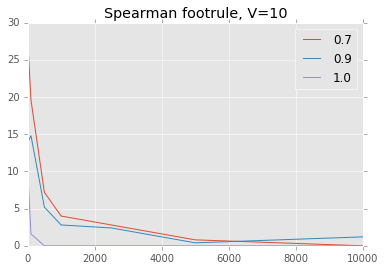

In [316]:
results = {}
V = 10
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))

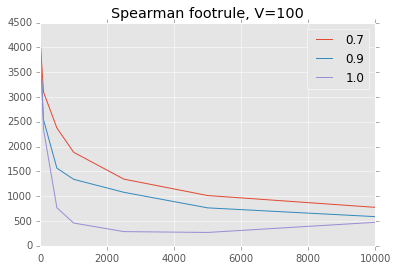

In [319]:
results = {}
V = 100
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))

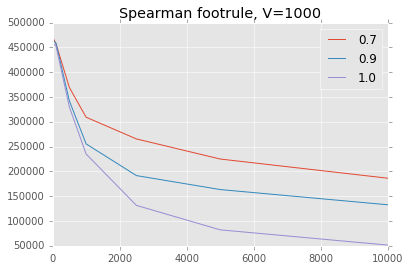

In [314]:
results = {}
V = 1000
for B in B_vals:
    results[B] = run_trial(V, B)
results = pd.DataFrame.from_dict(results)
results.index = POINTS
results.plot(title='Spearman footrule, V={}'.format(V))